**Author**: CodeForAll  
**License**: MIT License

---


# 📉 Root Locus Plot — Control Systems

## ✅ What is a Root Locus Plot?

The **root locus** is a graphical method used in control systems to analyze and design feedback systems. It shows how the **closed-loop poles** of a system move in the complex plane as the **gain** ($K$) of the system is varied from $0$ to $\infty$.

---

## ❓ Why is Root Locus Needed?

- To **analyze stability** of closed-loop control systems.
- To **predict pole locations** for different values of gain $K$.
- To **design controllers** (e.g., using proportional, lead-lag compensators).
- To **visualize how system dynamics change** with tuning.

---

## 🔍 Where Is It Used?

- In classical control system design
- For **tuning gain** ($K$) in negative feedback loops
- In designing compensators to **improve performance** (settling time, overshoot, etc.)
- In **stability analysis** for SISO systems

---

## 🧠 How to Read the Root Locus

- The plot is made from the **characteristic equation**:
  $$
  1 + K G(s)H(s) = 0
  $$
  where $G(s)H(s)$ is the **open-loop transfer function**.

- The **closed-loop poles** are the **roots** of the characteristic equation:
  $$
  \text{Den}(s) + K \cdot \text{Num}(s) = 0
  $$

- The root locus starts at **open-loop poles** (marked with ❌) and ends at **open-loop zeros** (marked with ⭕).  
  If there are more poles than zeros, the extra branches go to **infinity** along asymptotes.

---

### 🔎 What You Can See on the Plot:

| Feature                  | Interpretation                        |
|--------------------------|----------------------------------------|
| ❌ Pole location         | Start point of a root locus branch     |
| ⭕ Zero location         | End point of a branch (or at ∞)        |
| Left Half-Plane (LHP)   | Stable region                          |
| Right Half-Plane (RHP)  | Unstable region                        |
| Breakaway/Break-in      | Where poles split or meet              |
| Asymptotes              | Direction branches go as $K \to \infty$|
| Imaginary axis crossing | Used to determine **stability margin** |

---

## 📏 Stability from Root Locus

- If **all branches** of the root locus remain in the **left-half of the complex plane**, the system is **stable**.
- If **any pole** crosses into the **right-half**, the system becomes **unstable** for those $K$ values.

---

## 📌 Key Formulae

- **Number of branches**:  
  $$
  \text{Number of branches} = \text{Number of poles} = n
  $$

- **Asymptote angles** (when going to $\infty$):  
  $$
  \theta_k = \frac{(2k + 1)180^\circ}{n - m}, \quad k = 0, 1, ..., n-m-1
  $$

- **Asymptote center (centroid)**:  
  $$
  \sigma_a = \frac{\sum \text{poles} - \sum \text{zeros}}{n - m}
  $$

---

## 📈 Example Use Case

Design a controller so that the **closed-loop poles** lie in a region where:
- The system is **stable**
- It meets design specs like **damping ratio** or **natural frequency**

You can then choose the gain $K$ accordingly from the plot.

---


In [37]:
import matplotlib.pyplot as plt
import control as ctrl

def plot_root_locus(num, den, title="Root Locus Plot"):
    """
    Plots the root locus for a given transfer function.
    
    Parameters:
    - num: list or array of numerator coefficients
    - den: list or array of denominator coefficients
    - title: optional string for plot title
    """
    # Create the transfer function
    system = ctrl.TransferFunction(num, den)
    
    # Generate root locus plot
    rlist, klist = ctrl.root_locus(system, plot=True, color='red', grid=True)

    for i in range(len(rlist[0])):
        traj = [r[i] for r in rlist]
        plt.plot([p.real for p in traj], [p.imag for p in traj], 'r')
        # Add a small arrow at some point
        if len(traj) > 5:
            start = traj[5]
            end = traj[6]
            plt.annotate('', xy=(end.real, end.imag), xytext=(start.real, start.imag),
                        arrowprops=dict(arrowstyle="->", color='red'))
    
    # Customize plot
    plt.title(title)
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")
    plt.grid(True)
    plt.axvline(0, color='k', linestyle='--')  # imaginary axis
    plt.show()


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


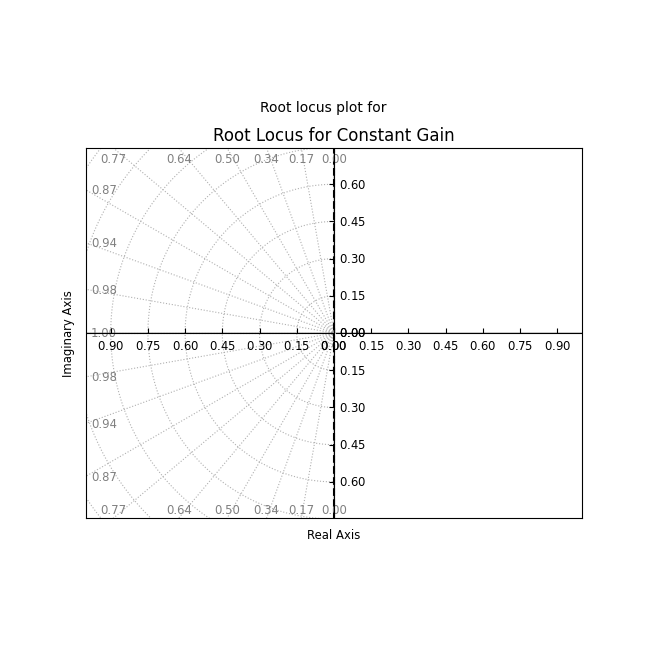

In [38]:
numerator_const = [10]
denominator_const = [1]
plot_root_locus(numerator_const, denominator_const, title="Root Locus for Constant Gain")

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


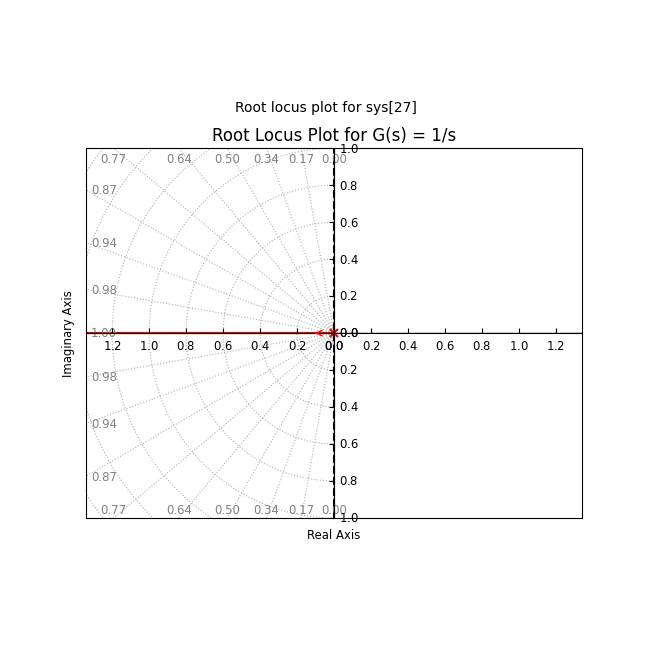

*** Plot Complete ***



In [39]:
numerator_const = [1]
denominator_const = [1, 0]

plot_root_locus(
    numerator_const,
    denominator_const,
    title=f'Root Locus Plot for G(s) = 1/s'
)
print("*** Plot Complete ***\n")

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


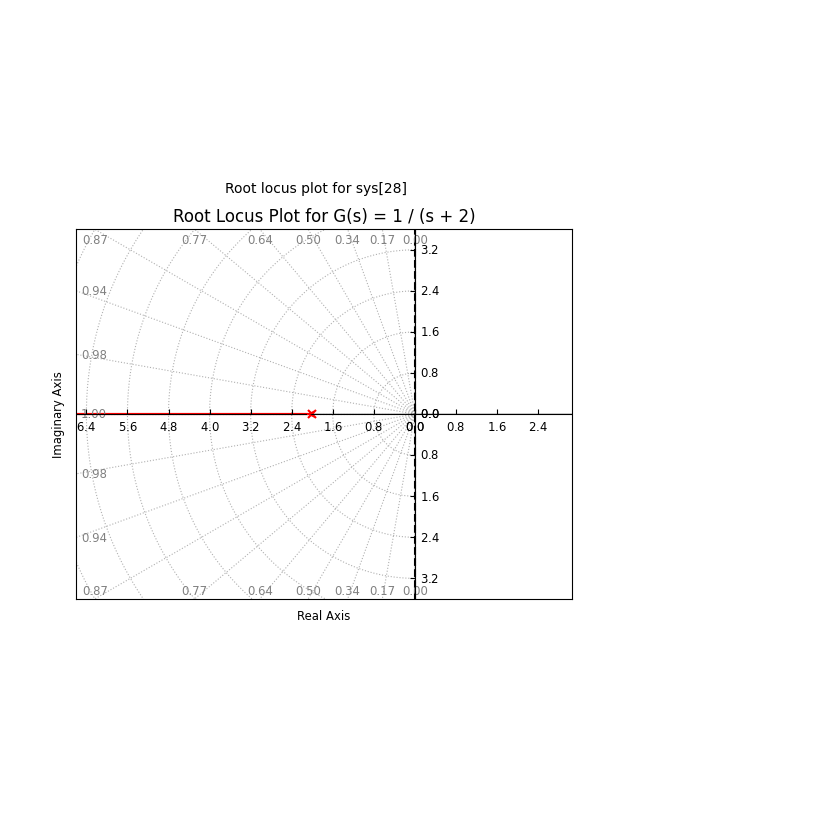

In [40]:
numerator_real_pole = [1]
denominator_real_pole = [1, 2]

plot_root_locus(
    numerator_real_pole,
    denominator_real_pole,
    title='Root Locus Plot for G(s) = 1 / (s + 2)'
)


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


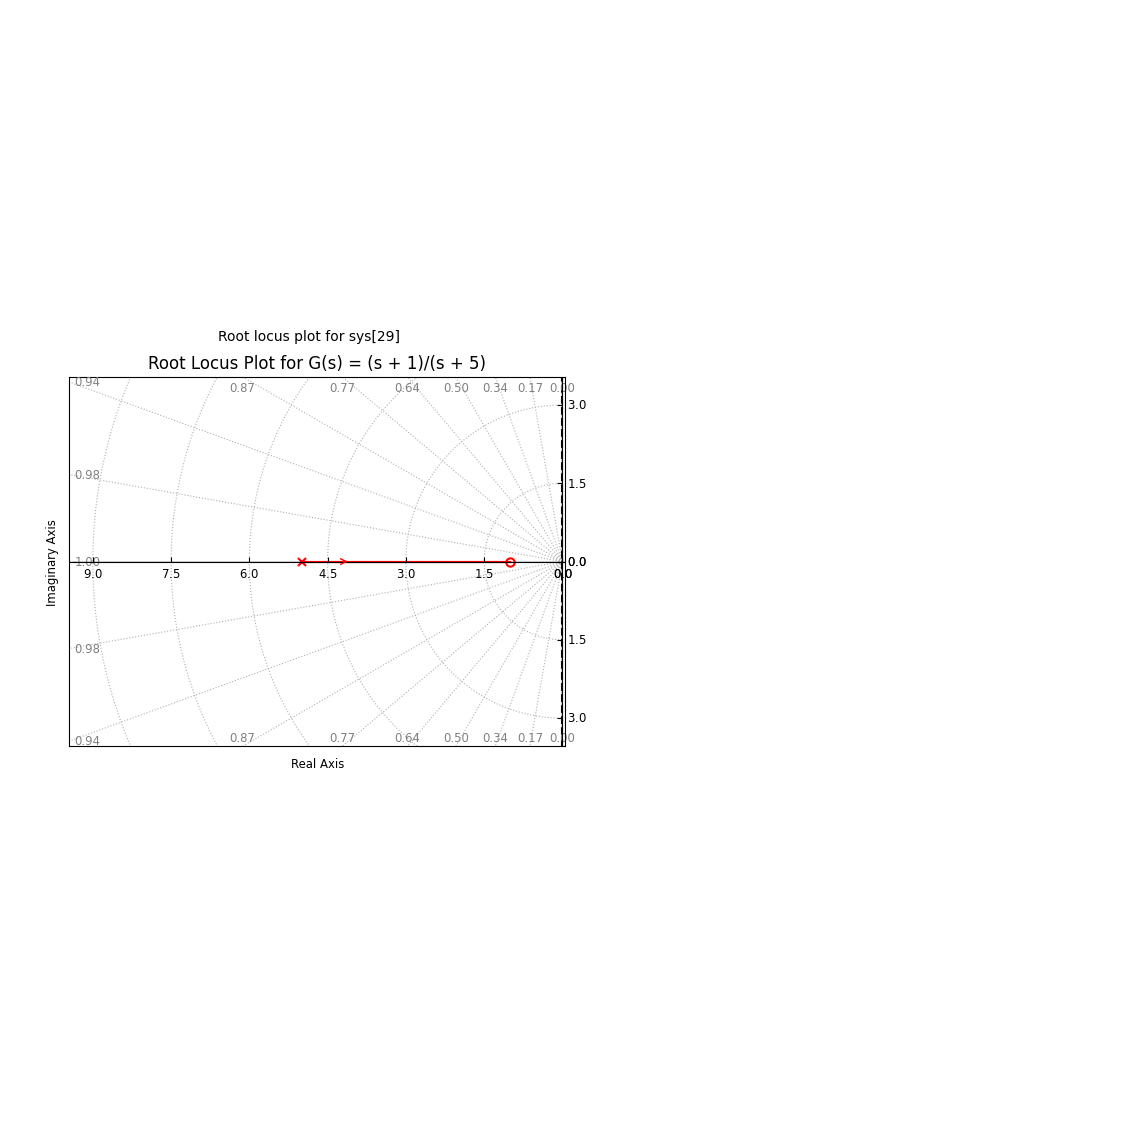

In [41]:
numerator = [1, 1]
denominator = [1, 5]

plot_root_locus(
    numerator,
    denominator,
    title='Root Locus Plot for G(s) = (s + 1)/(s + 5)'
)

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


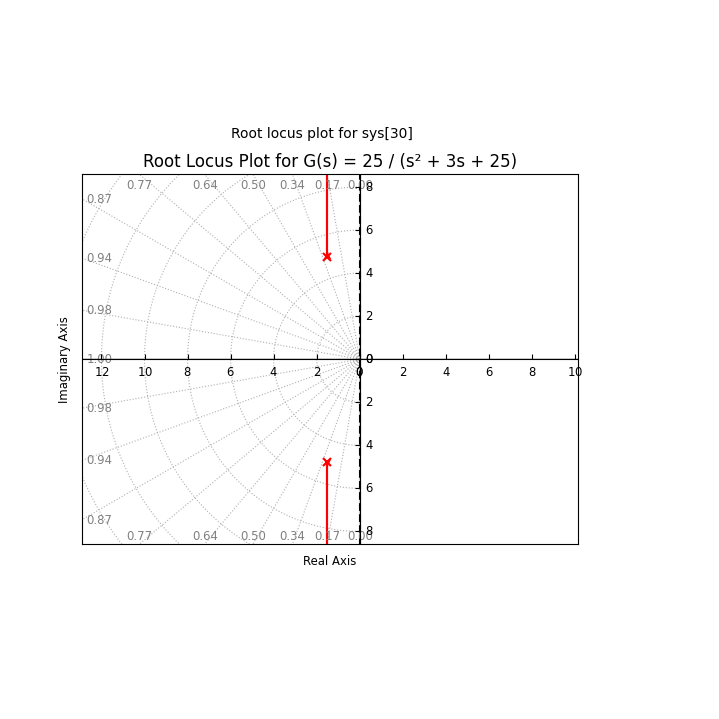

In [42]:
numerator = [25]
denominator = [1, 3, 25]

plot_root_locus(
    numerator,
    denominator,
    title='Root Locus Plot for G(s) = 25 / (s² + 3s + 25)'
)

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


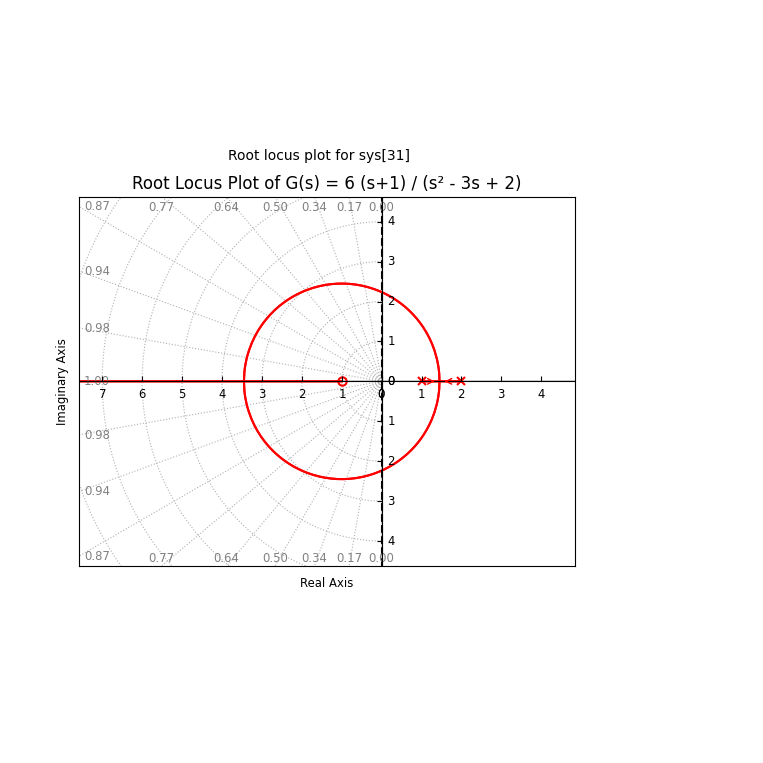

In [43]:
numerator=[6, 6]
denominator=[1, -3, 2]

plot_root_locus(
    numerator,
    denominator,
    title='Root Locus Plot of G(s) = 6 (s+1) / (s² - 3s + 2)',
)